In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io as scio
import warnings
import seaborn as sns
from scipy.optimize import root
from matplotlib.font_manager import FontProperties

warnings.filterwarnings('ignore', category=RuntimeWarning)

rural = np.arange(0, 60, 2)
urban = np.arange(1, 60, 2)
east = np.r_[0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 24, 25, 28, 29, 36, 37, 40, 41]
middle = np.r_[6, 7, 22, 23, 26, 27, 30, 31, 32, 33, 34, 35]
west = np.r_[8, 9, 10, 11, 12, 13, 14, 15, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
high_flow_in = [0, 1, 2, 3, 8, 10, 12, 18, 20] # 前30%
low_flow_in = [4, 5, 6, 7, 9, 11, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29] # 前70%

font_path = r'C:\Windows\Fonts\simsun.ttc'
chinese_font = FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc')
english_font = FontProperties(fname=r'C:\Windows\Fonts\Arial.ttf')
pd.options.display.float_format = '{:.3f}'.format

# 定义计算基尼系数的函数
def gini_index(array):
    cum_wealths = np.cumsum(sorted(np.append(array, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / float(len(cum_wealths)-1)
    yarray = cum_wealths / sum_wealths
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A + B)

In [2]:
# 分析模拟结果

simulation_results = pd.read_csv('./data/Simulation_results.csv')
simulation_results = simulation_results.round(3)
simulation_results = simulation_results[simulation_results['dW_country']>2]

dW_country_both = 6.4031
dV_country_both = 3.8140
dincgini_country_both = -9.4432

pareto_sample = simulation_results[
    (simulation_results['dW_country'] > dW_country_both) &
    (simulation_results['dV_country'] > dV_country_both) &
    (simulation_results['dincgini_country'] < dincgini_country_both)
]

print(len(simulation_results), str(round(len(pareto_sample) / len(simulation_results) * 100, 2))+'%')
#simulation_results.sort_values(by=['dincgini_country'], ascending=True)

489809 0.62%


In [3]:
simulation_results['total_avg2'] = (1 + simulation_results['dW_country'] / 100) ** (1/3) * (1 + simulation_results['dV_country'] / 100) ** (1/3) * (1 + simulation_results['dincgini_country'] / 100) ** (-1/3)

simulation_results = simulation_results.sort_values(by=['total_avg2'], ascending=False).reset_index(drop=True)
best_policy_dW = simulation_results.loc[0, 'dW_country']
best_policy_dincgini = simulation_results.loc[0, 'dincgini_country']
best_policy_dV = simulation_results.loc[0, 'dV_country']
simulation_results

,dK0,dK1,dK2,dK3,dK4,dK5,dK6,dK7,dK8,dK9,...,dK56,dK57,dK58,dK59,dW_country,dincgini_country,dV_country,total_avg2,dK_high_flow_in,dK_low_flow_in
0,1.000,1.135,1.000,1.711,1.000,1.001,1.000,1.170,1.000,1.010,...,1.000,1.807,1.000,1.041,8.036,-8.382,4.694,1.073,1.301,NaN
1,1.000,1.177,1.000,1.428,1.000,1.032,1.000,1.100,1.000,1.025,...,1.000,1.524,1.000,1.007,8.196,-7.934,4.941,1.072,1.282,NaN
2,1.000,1.005,1.000,1.186,1.000,1.054,1.000,1.135,1.000,1.037,...,1.000,1.758,1.000,1.108,7.510,-8.989,4.349,1.072,1.185,NaN
3,1.000,1.119,1.000,1.092,1.000,1.062,1.000,1.077,1.000,1.002,...,1.000,1.297,1.000,1.095,7.641,-8.684,4.556,1.072,1.221,NaN
4,1.000,1.045,1.000,1.021,1.000,1.099,1.000,1.235,1.000,1.023,...,1.000,1.317,1.000,1.048,7.691,-8.671,4.512,1.072,1.232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489804,1.000,1.371,1.000,1.700,1.000,1.007,1.000,1.106,1.000,1.164,...,1.000,1.004,1.000,1.205,6.382,-8.607,3.750,1.065,1.243,NaN
489805,1.000,1.815,1.000,1.042,1.000,1.012,1.000,1.044,1.000,1.158,...,1.000,1.306,1.000,1.240,6.638,-8.271,3.870,1.065,1.193,NaN
489806,1.000,1.784,1.000,1.038,1.000,1.084,1.000,1.009,1.000,1.093,...,1.000,1.049,1.000,1.179,6.606,-8.289,3.833,1.065,1.209,NaN
489807,1.000,1.636,1.000,1.050,1.000,1.084,1.000,1.039,1.000,1.123,...,1.000,1.834,1.000,1.145,6.249,-8.797,3.597,1.065,1.202,NaN


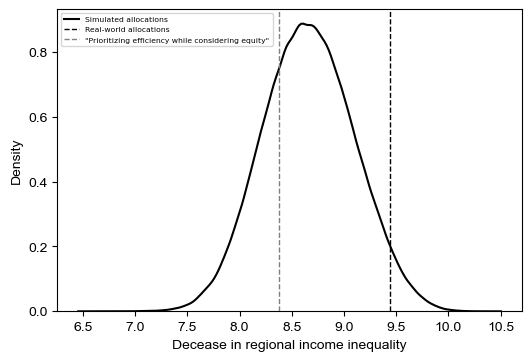

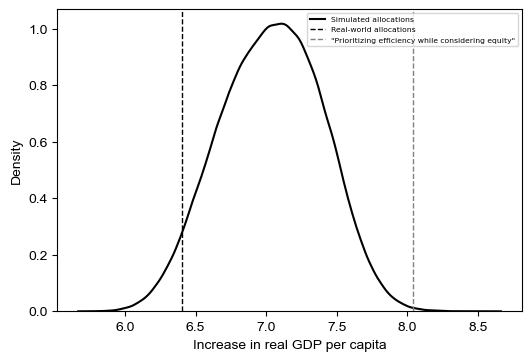

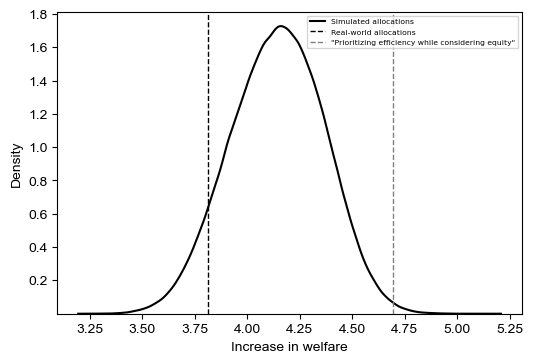

In [10]:
# 画图查看政策导向

## 省际人均实际GDP基尼系数
fig, ax = plt.subplots(dpi=100)
sns.kdeplot(-simulation_results.dincgini_country, color='k', linestyle='-', label='Simulated allocations')
ax.axvline(-dincgini_country_both, color='0.0', ls='--', lw=1, label='Real-world allocations')
ax.axvline(-best_policy_dincgini, color='0.5', ls='--', lw=1, label='"Prioritizing efficiency while considering equity"')
ax.set_ylabel('Density', fontproperties=english_font)
ax.set_xlabel('Decease in regional income inequality', fontproperties=english_font)

for tick in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels() + ax.get_xticklabels():
    tick.set_fontproperties(english_font)
plt.legend(fontsize=5.5)
plt.show()

## 全国人均实际GDP
fig, ax = plt.subplots(dpi=100)
sns.kdeplot(simulation_results.dW_country, color='k', linestyle='-', label='Simulated allocations')
ax.axvline(dW_country_both, color='0.0', ls='--', lw=1, label='Real-world allocations')
ax.axvline(best_policy_dW, color='0.5', ls='--', lw=1, label='"Prioritizing efficiency while considering equity"')
ax.set_ylabel('Density', fontproperties=english_font)
ax.set_xlabel('Increase in real GDP per capita', fontproperties=english_font)

for tick in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels() + ax.get_xticklabels():
    tick.set_fontproperties(english_font)
plt.legend(fontsize=5.5)
plt.show()

## 全国居民平均福利
fig, ax = plt.subplots(dpi=100)
sns.kdeplot(simulation_results.dV_country, color='k', linestyle='-', label='Simulated allocations')
ax.axvline(dV_country_both, color='0.0', ls='--', lw=1, label='Real-world allocations')
ax.axvline(best_policy_dV, color='0.5', ls='--', lw=1, label='"Prioritizing efficiency while considering equity"')
ax.set_ylabel('Density', fontproperties=english_font)
ax.set_xlabel('Increase in welfare', fontproperties=english_font)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])

for tick in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels() + ax.get_xticklabels():
    tick.set_fontproperties(english_font)
plt.legend(fontsize=5.5)
plt.show()


In [ ]:
## 更优政策的特征：人口流入大省的土地份额(1)

simulation_results = simulation_results.sample(frac=1, random_state=42).reset_index(drop=True)
simulation_results['dK_high_flow_in'] = np.nan
simulation_results['dK_low_flow_in'] = np.nan

for index, row in simulation_results.iterrows():
    if np.isnan(simulation_results.iloc[index, -1])==True:
        each_dK_urban = np.array(simulation_results.iloc[index, 1:60:2])
        each_dK_high_flow_in = each_dK_urban[high_flow_in].mean()
        #each_dK_low_flow_in = each_dK_urban[low_flow_in].mean()
        simulation_results.loc[index, 'dK_high_flow_in'] = each_dK_high_flow_in
        #simulation_results.loc['dK_low_flow_in'] = each_dK_low_flow_in
        print(str(index) + '/' + str(len(simulation_results)), end='\r')

#simulation_results.to_csv('./data/Simulation_results.csv', index=False)
print('\nFinished!')

In [12]:
simulation_results.head(1)

,dK0,dK1,dK2,dK3,dK4,dK5,dK6,dK7,dK8,dK9,...,dK56,dK57,dK58,dK59,dW_country,dincgini_country,dV_country,total_avg2,dK_high_flow_in,dK_low_flow_in
0,1.000,1.135,1.000,1.711,1.000,1.001,1.000,1.170,1.000,1.010,...,1.000,1.807,1.000,1.041,8.036,-8.382,4.694,1.073,1.301,NaN


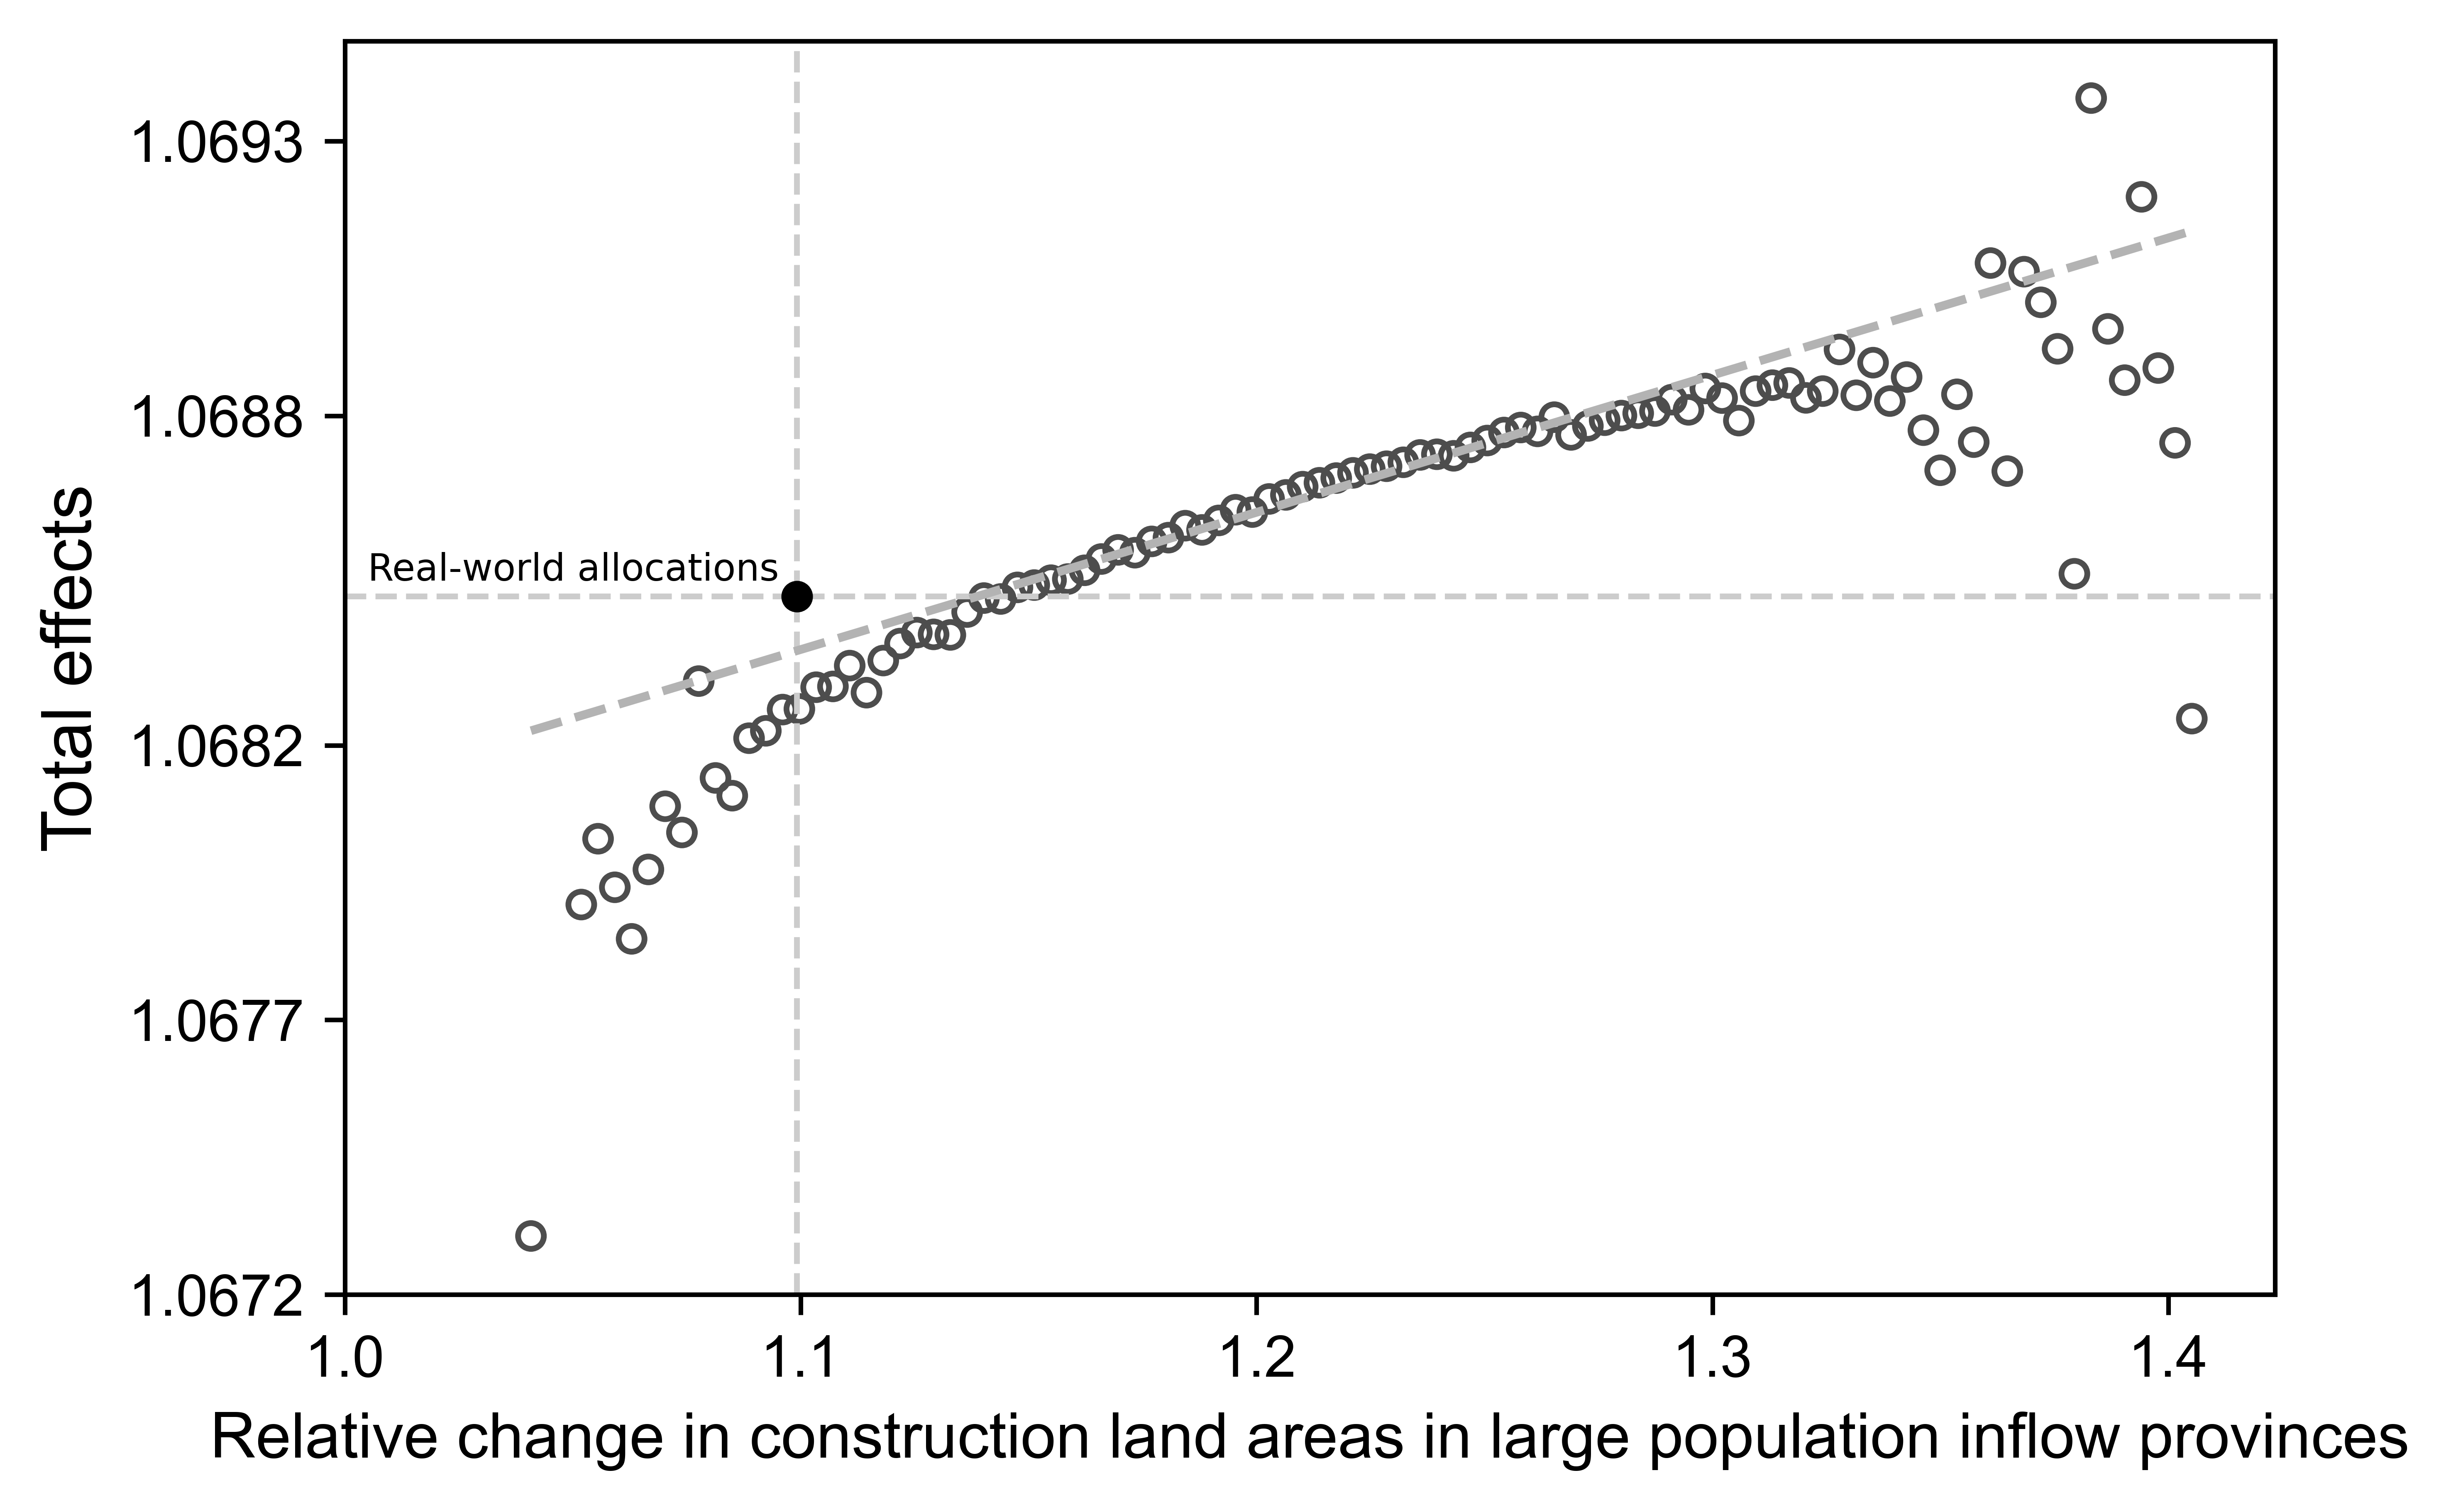

In [106]:
## 更优政策的特征：人口流入大省的土地份额(2)

dK_high_flow_in_list = list(simulation_results.sort_values(by=['dK_high_flow_in']).loc[:, 'dK_high_flow_in'])
smallest_dK_high_flow_in = dK_high_flow_in_list[0]
highest_dK_high_flow_in = dK_high_flow_in_list[-1]
hist_num = 100
interval_width = (highest_dK_high_flow_in - smallest_dK_high_flow_in) / hist_num
interval_left = [smallest_dK_high_flow_in + i * interval_width for i in range(hist_num)]
interval_right = [smallest_dK_high_flow_in + (i + 1) * interval_width for i in range(hist_num)]

cmogram_data = pd.DataFrame({'interval_left' : interval_left, 'interval_right' : interval_right})
cmogram_data['interval_middle'] = (cmogram_data['interval_right'] + cmogram_data['interval_left']) / 2
cmogram_data['outcome_mean'] = np.nan

for index, row in cmogram_data.iterrows():
    i_interval_left = cmogram_data.loc[index, 'interval_left']
    i_interval_right = cmogram_data.loc[index, 'interval_right']

    if index == 0:
        i_matched_data = simulation_results[
                                            (simulation_results['dK_high_flow_in'] >= i_interval_left) &
                                            (simulation_results['dK_high_flow_in'] <= i_interval_right)
                                        ]
    else:
        i_matched_data = simulation_results[
                                            (simulation_results['dK_high_flow_in'] > i_interval_left) &
                                            (simulation_results['dK_high_flow_in'] <= i_interval_right)
                                        ]

    if len(i_matched_data) > 0:
        cmogram_data.loc[index, 'outcome_mean'] = i_matched_data['total_avg2'].mean()


fig, ax = plt.subplots(dpi=1000)
ax.scatter(cmogram_data['interval_middle'], cmogram_data['outcome_mean'], marker='o', facecolors='none', edgecolors='0.3', s=20)
slope, intercept = np.polyfit(simulation_results['dK_high_flow_in'], simulation_results['total_avg2'], 1)
ax.plot(cmogram_data['interval_middle'], slope * cmogram_data['interval_middle'] + intercept, color='0.7', linestyle='--')
real_world_allocation = 1.099192721992186
real_world_outcomes = (1 + 0.06403) ** (1/3) * (1 + 0.03814) ** (1/3) * (1 - 0.09443) ** (-1/3)
ax.axvline(real_world_allocation, color='0.8', ls='--', lw=1, zorder=1)
ax.axhline(real_world_outcomes, color='0.8', ls='--', lw=1, zorder=1)
ax.scatter(real_world_allocation, real_world_outcomes, marker='o', facecolors='0', edgecolors='0', s=20, zorder=2)

ax.annotate('Real-world allocations', xy=(1.005, 1.0685), size=6.5)

ax.set_xlabel('Relative change in construction land areas in large population inflow provinces', fontproperties=english_font, fontsize=11)
ax.set_ylabel('Total effects', fontproperties=english_font, fontsize=12)
ax.set_yticks([1.0672, 1.0677, 1.0682, 1.0688, 1.0693])
ax.set_xticks([1, 1.1, 1.2, 1.3, 1.4])

for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontproperties(english_font)
plt.show()

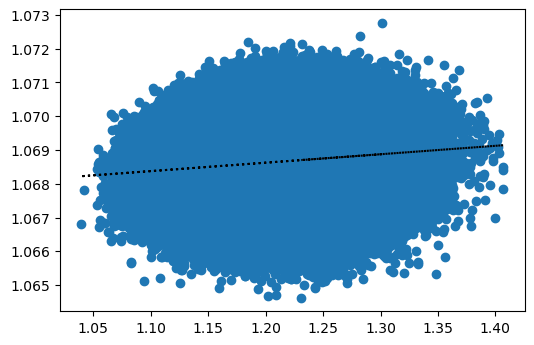

In [11]:
## 更优政策的特征：人口流入大省的土地份额(2)

fig, ax = plt.subplots(dpi=100)

ax.scatter(simulation_results['dK_high_flow_in'], simulation_results['total_avg2'])
slope1, intercept1 = np.polyfit(simulation_results['dK_high_flow_in'].astype(float), simulation_results['total_avg2'].astype(float), 1)
ax.plot(simulation_results['dK_high_flow_in'], slope1 * simulation_results['dK_high_flow_in'] + intercept1, color='k', linestyle=':', label='线性趋势')
plt.show()

In [44]:
simulation_results

,dK0,dK1,dK2,dK3,dK4,dK5,dK6,dK7,dK8,dK9,...,dK56,dK57,dK58,dK59,dW_country,dincgini_country,dV_country,total_avg2,dK_high_flow_in,dK_low_flow_in
0,1.000,1.284,1.000,1.584,1.000,1.052,1.000,1.034,1.000,1.129,...,1.000,1.616,1.000,1.083,6.916,-8.923,4.026,1.069,1.171,NaN
1,1.000,1.023,1.000,1.061,1.000,1.046,1.000,1.127,1.000,1.106,...,1.000,1.089,1.000,1.168,7.318,-8.727,4.344,1.071,1.167,NaN
2,1.000,1.483,1.000,1.245,1.000,1.075,1.000,1.002,1.000,1.126,...,1.000,1.606,1.000,1.101,6.781,-8.580,4.035,1.067,1.184,NaN
3,1.000,1.396,1.000,1.564,1.000,1.041,1.000,1.199,1.000,1.102,...,1.000,1.146,1.000,1.020,7.009,-8.533,4.098,1.068,1.273,NaN
4,1.000,1.584,1.000,1.452,1.000,1.042,1.000,1.104,1.000,1.071,...,1.000,1.180,1.000,1.064,7.586,-8.092,4.520,1.070,1.254,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489804,1.000,1.377,1.000,1.005,1.000,1.042,1.000,1.109,1.000,1.005,...,1.000,1.122,1.000,1.010,7.194,-8.435,4.235,1.069,1.242,NaN
489805,1.000,1.217,1.000,1.176,1.000,1.066,1.000,1.178,1.000,1.101,...,1.000,1.310,1.000,1.085,6.344,-9.460,3.726,1.068,1.145,NaN
489806,1.000,1.599,1.000,1.383,1.000,1.033,1.000,1.201,1.000,1.028,...,1.000,1.187,1.000,1.046,7.501,-8.099,4.506,1.069,1.246,NaN
489807,1.000,1.239,1.000,1.398,1.000,1.001,1.000,1.145,1.000,1.016,...,1.000,1.122,1.000,1.109,7.137,-8.664,4.192,1.069,1.204,NaN
